In [1]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import MinMaxScaler

## 독거노인

In [2]:
df_독거노인= pd.read_excel('독거노인_정규화.xlsx', encoding='utf-8', thousands = ',') #숫자의 자릿수를 표현하는 ',' 제거

del df_독거노인['Unnamed: 0']

#df_독거노인

## 요양기관

In [3]:
df_요양기관= pd.read_excel('요양기관_정규화.xlsx', encoding='utf-8', thousands = ',')

del df_요양기관['Unnamed: 0'] # Unnamed:0 제거

#df_요양기관

## 기초생활보장수급

In [4]:
df_기초생활= pd.read_excel('기초생활보장수급자_정규화.xlsx', encoding='utf-8', thousands = ',')

del df_기초생활['Unnamed: 0'] # Unnamed:0 제거

#df_기초생활

## 소득

In [5]:
df_소득= pd.read_excel('소득_정규화.xlsx', encoding='utf-8', thousands = ',')

del df_소득['Unnamed: 0'] # Unnamed:0 제거

#df_소득

## 생활인구

In [6]:
df_생활인구= pd.read_excel('생활인구_정규화.xlsx', encoding='utf-8', thousands = ',')

del df_생활인구['Unnamed: 0']
#df_생활인구

## 연금

In [7]:
df_연금= pd.read_excel('연금_정규화.xlsx', encoding='utf-8', thousands = ',')

del df_연금['Unnamed: 0']

#df_연금

## 은행

In [8]:
df_은행= pd.read_excel('은행_정규화.xlsx', encoding='utf-8', thousands = ',')

del df_은행['Unnamed: 0']

#df_은행

## 타겟A

In [9]:
df_타겟_a= pd.read_excel('target_a3.xlsx', encoding='utf-8', thousands = ',')
del df_타겟_a['Unnamed: 0'] 
#df_타겟_a

## 타겟B

In [10]:
df_타겟_b= pd.read_excel('target_b3.xlsx', encoding='utf-8', thousands = ',')
del df_타겟_b['Unnamed: 0'] 
#df_타겟_b

In [11]:
#target a merge : 독거노인 + 요양기관 + 기초생활보장수급
df_a= pd.merge(df_독거노인, df_요양기관, on=["구", "동"] ,  how='left')
#df_a

In [12]:
#merge column 삭제 및 rename
del df_a['행정동코드_y']
df_a.columns = ['행정동코드', '구', '동', '행정동별독거노인합계', '행정동별요양기관정원']
#df_a

In [13]:
#target a merge : 독거노인 + 요양기관 + 기초생활보장수급
df_a= pd.merge(df_a, df_기초생활, on=["구", "동"] ,  how='left')

In [14]:
del df_a['행정동코드_y']
df_a.columns = ['행정동코드', '구', '동', '행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생활보장수급자합계']
#df_a

In [15]:
#은행 수 데이터 merge
df_a= pd.merge(df_a, df_은행, on=["구", "동"], how='left')
df_a.columns

Index(['행정동코드_x', '구', '동', '행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생활보장수급자합계',
       '행정동코드_y', '행정동별은행합계'],
      dtype='object')

In [16]:
del df_a['행정동코드_y']
df_a.columns = ['행정동코드', '구', '동', '행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생활보장수급자합계', '행정동별은행합계']
#df_a.columns = ['행정동코드', '구', '동', '행정동별독거노인합계', '행정동별요양기관정원', '행정동별은행합계']
#df_a

In [17]:
#target 데이터 merge
df_a= pd.merge(df_a, df_타겟_a, on=["구", "동"], how='left')
df_a.columns

Index(['행정동코드_x', '구', '동', '행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생활보장수급자합계',
       '행정동별은행합계', '행정동코드_y', 'target_a3'],
      dtype='object')

In [18]:
del df_a['행정동코드_y']
df_a.columns = ['행정동코드', '구', '동', '행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생활보장수급자합계', '행정동별은행합계', 'target_a3']
#df_a.columns = ['행정동코드', '구', '동', '행정동별독거노인합계', '행정동별요양기관정원', '행정동별은행합계', 'target_a']
#df_a

In [19]:
#merge 소득 + 연금
df_b= pd.merge(df_소득, df_연금, on=["구", "동"] , how='left')

In [20]:
del df_b['행정동코드_y']
df_b.columns = ['행정동코드', '구', '동', '행정동별평균소득', '행정동별연금평균']
#df_b

In [21]:
#merge 생활인구
df_b= pd.merge(df_b, df_생활인구, on=["구", "동"], how='left')

In [22]:
del df_b['행정동코드_y']
df_b.columns = ['행정동코드', '구', '동', '행정동별평균소득', '행정동별연금평균', '행정동별생활인구합계']
#df_b

In [23]:
#merge 은행수
df_b= pd.merge(df_b, df_은행, on=["구", "동"], how='left')

In [24]:
del df_b['행정동코드_y']
df_b.columns = ['행정동코드', '구', '동', '행정동별평균소득', '행정동별연금평균', '행정동별생활인구합계', '행정동별은행합계']
#df_b

In [25]:
#merge target
df_b= pd.merge(df_b, df_타겟_b, on=["구", "동"], how='left')

In [26]:
del df_b['행정동코드_y']
df_b.columns = ['행정동코드', '구', '동', '행정동별평균소득', '행정동별연금평균', '행정동별생활인구합계', '행정동별은행합계', 'target_b3']
#df_b

In [27]:
#df_a

In [28]:
#df_b

In [29]:
data_a = df_a[['행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생활보장수급자합계', '행정동별은행합계']]
#data_a = df_a[['행정동별독거노인합계', '행정동별요양기관정원', '행정동별은행합계']]


In [30]:
target_a = df_a['target_a3']

In [31]:
data_a_feature_names = ['행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생활보장수급자합계', '행정동별은행합계']
#data_a_feature_names = ['행정동별독거노인합계', '행정동별요양기관정원', '행정동별은행합계']

In [32]:
#target_a_target_names = ['0', '1']
target_a_target_names = ['후순위지역', '우선지역' ]

In [33]:
data_b = df_b[['행정동별평균소득', '행정동별연금평균', '행정동별생활인구합계', '행정동별은행합계' ]]

In [34]:
target_b = df_b['target_b3']

In [35]:
data_b_feature_names = ['행정동별평균소득', '행정동별연금평균', '행정동별생활인구합계', '행정동별은행합계' ]

In [36]:
#target_b_target_names = ['0', '1']
target_b_target_names = ['후순위지역', '우선지역']

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(data_a, target_a,
                                                   test_size=0.2,
                                                   random_state=333)
print(x_a_train.shape, x_a_test.shape, y_a_train.shape, y_a_test.shape)

(339, 4) (85, 4) (339,) (85,)


In [39]:
x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(data_b, target_b,
                                                   test_size=0.2,
                                                   random_state=333)
print(x_b_train.shape, x_b_test.shape, y_b_train.shape, y_b_test.shape)

(339, 4) (85, 4) (339,) (85,)


In [40]:
from sklearn import tree

In [41]:
import graphviz

In [42]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

In [43]:
clf3_a = tree.DecisionTreeClassifier(criterion = "entropy", max_depth= 2)

In [44]:
clf3_b = tree.DecisionTreeClassifier(criterion = "entropy", max_depth= 2)

In [45]:
clf3_a_dt = clf3_a.fit(x_a_train, y_a_train)

y_a_pred3 = clf3_a.predict(x_a_test)

print(confusion_matrix(y_a_test, y_a_pred3))
print(accuracy_score(y_a_test, y_a_pred3))

[[56  5]
 [17  7]]
0.7411764705882353


In [46]:
clf3_b_dt = clf3_b.fit(x_b_train, y_b_train)

y_b_pred3 = clf3_b.predict(x_b_test)

print(confusion_matrix(y_b_test, y_b_pred3))
print(accuracy_score(y_b_test, y_b_pred3))

[[42  7]
 [29  7]]
0.5764705882352941


In [47]:
dot_data3_a = tree.export_graphviz(clf3_a_dt, out_file =None, 
                               feature_names = data_a_feature_names,
                               class_names = target_a_target_names,
                               filled = True, rounded =True)

graph3_a = graphviz.Source(dot_data3_a)

In [48]:
dot_data3_b = tree.export_graphviz(clf3_b_dt, out_file =None, 
                               feature_names = data_b_feature_names,
                               class_names = target_b_target_names,
                               filled = True, rounded =True)

graph3_b = graphviz.Source(dot_data3_b)

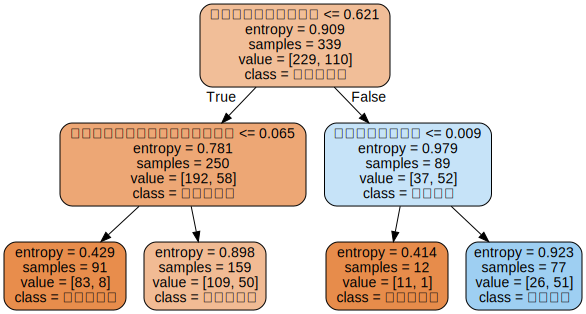

In [49]:
graph3_a #data_a = df_a[['행정동별독거노인합계', '행정동별요양기관정원', '행정동별기초생활보장수급자합계', '행정동별은행합계']]

In [50]:
accuracy_score(target_a, clf3_a.predict(data_a))

0.7476415094339622

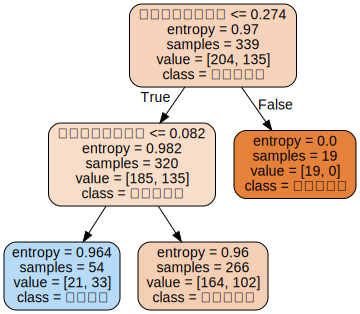

In [51]:
graph3_b #data_b = df_b[['행정동별평균소득', '행정동별연금평균', '행정동별생활인구합계', '행정동별은행합계' ]]

In [52]:
accuracy_score(target_b, clf3_b.predict(data_b))

0.625